In [1]:
import pandas as pd

In [2]:
income=pd.read_csv('us_income.csv')

In [3]:
# The first 5 rows of the data.
print(income.head())
lowest_income_county = income["county"][income["median_income"].idxmin()]

high_pop = income[income["pop_over_25"] > 500000]
lowest_income_high_pop_county = high_pop["county"][high_pop["median_income"].idxmin()]

     id                   county  pop_over_25  median_income  \
0  1001  Autauga County, Alabama        35696          34581   
1  1003  Baldwin County, Alabama       130063          31352   
2  1005  Barbour County, Alabama        18988          25182   
3  1007     Bibb County, Alabama        15340          27638   
4  1009   Blount County, Alabama        38846          32808   

   median_income_no_hs  median_income_hs  median_income_some_college  \
0                17946             30157                       33225   
1                17474             25242                       30922   
2                20692             21325                       24090   
3                22274             28980                       22387   
4                24870             27541                       34660   

   median_income_college  median_income_graduate_degree  
0                  53248                          68125  
1                  46017                          55933  
2       

 Generate Random numbers

In [4]:
import random

# Returns a random integer between the numbers 0 and 10, inclusive.
num = random.randint(0, 10)

# Generate a sequence of 10 random numbers between the values of 0 and 10.
random_sequence = [random.randint(0, 10) for _ in range(10)]

# Sometimes, when we generate a random sequence, we want it to be the same sequence whenever the program is run.
# An example is when you use random numbers to select a subset of the data, and you want other people
# looking at the same data to get the same subset.
# We can ensure this by setting a random seed.
# A random seed is an integer that is used to "seed" a random number generator.
# After a random seed is set, the numbers generated after will follow the same sequence.
random.seed(10)
print([random.randint(0,10) for _ in range(5)])
random.seed(10)
# Same sequence as above.
print([random.randint(0,10) for _ in range(5)])
random.seed(11)
# Different seed means different sequence.
print([random.randint(0,10) for _ in range(5)])

[6, 4, 6, 2, 8]
[6, 4, 6, 2, 8]
[4, 6, 10, 5, 5]


Selecting items from a list

In [5]:
# Let's say that we have some data on how much shoppers spend in a store.
shopping = [300, 200, 100, 600, 20]

# We want to sample the data, and only select 4 elements.

random.seed(1)
shopping_sample = random.sample(shopping, 4)
# 4 random items from the shopping list.
print(shopping_sample)

[300, 600, 100, 20]


Population vs sample

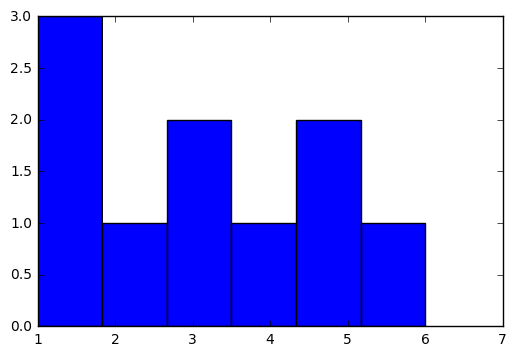

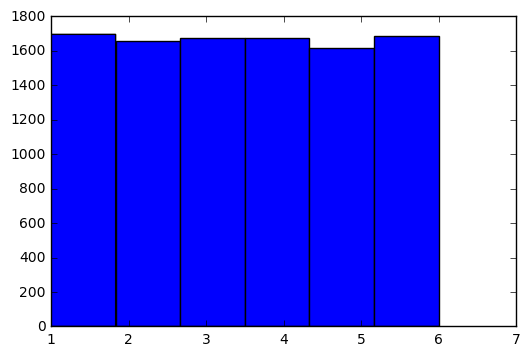

In [7]:
import matplotlib.pyplot as plt

# A function that returns the result of a die roll.
def roll():
    return random.randint(1, 6)

random.seed(1)
small_sample = [roll() for _ in range(10)]

# Plot a histogram with 6 bins (1 for each possible outcome of the die roll)
plt.hist(small_sample, 6)
plt.show()
#plot for 1000 sample
random.seed(1)
large_sample=[roll() for _ in range(10000)]
plt.hist(large_sample,6)
plt.show()

#As you can see from the graphs above, the probability of rolling a 1 should be around .166. 
#However, we only really noticed the probability reaching this value once we got to 10000 dice rolls. 
#Generally, the lower your sample size, the more variability the probability will have around the "true" probability. 

Finding the right sample size

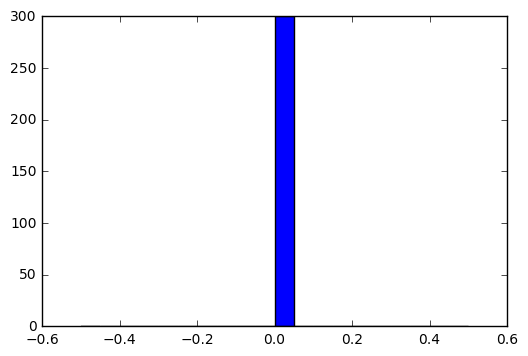

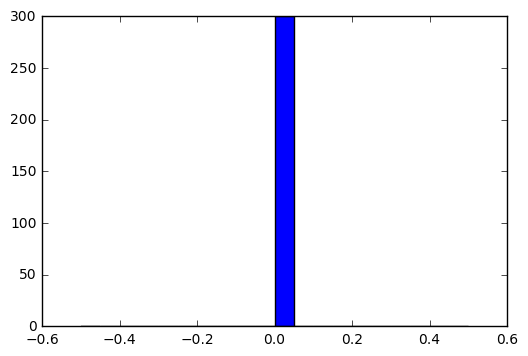

In [9]:
# A function that returns the result of a die roll.
def roll():
    return random.randint(1, 6)

def probability_of_one(num_trials, num_rolls):
    """
    This function will take in the number of trials, and the number of rolls per trial.
    Then it will conduct each trial, and record the probability of rolling a one.
    """
    probabilities = []
    for i in range(num_trials):
        die_rolls = [roll() for _ in range(num_rolls)]
        one_prob = len([d for d in die_rolls if d==1]) / num_rolls
        probabilities.append(one_prob)
    return probabilities

random.seed(1)
small_sample = probability_of_one(300, 50)
plt.hist(small_sample, 20)
plt.show()

#generate probabilities for 300 trials of 1000 die rolls each
random.seed(1)
large_sample=probability_of_one(300,1000)
plt.hist(large_sample,20)
plt.show()

Trial our program in 100 counties, and measure the median incomes of both groups in 5 years

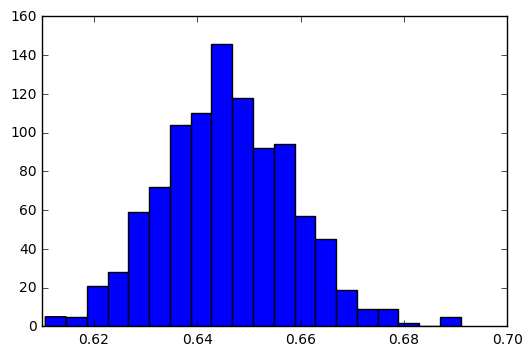

In [10]:
def select_random_sample(count):
    random_indices = random.sample(range(0, income.shape[0]), count)
    return income.iloc[random_indices]

random.seed(1)
mean_ratios = []
for i in range(1000):
    sample = select_random_sample(100)
    ratios = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(ratios.mean())
plt.hist(mean_ratios, 20)
plt.show()    

After 5 years, we determine that the mean ratio in our random sample of 100 counties is .675 -- that is, high school graduates on average earn 67.5% of what college graduates do.

Calculate Statistical significance

In [20]:
significance_value = None
#print(mean_ratios)
val=len([i for i in mean_ratios if i >=0.675 ])
print(val)
print(len(mean_ratios))
significance_value=float(val/len(mean_ratios))

16
1000


Our significance value was .014. Based on the entire population, only 1.4% of the time will the wage results we saw have occurred on their own. So our experiment exceeded our significance level (lower means more significant)

You may have noticed earlier that the more samples in our trials, the "steeper" the histograms of outcomes get (look back on the probability of rolling one with the die if you need a refresher). This "steepness" arose because the more trials we have, the less likely the value is to vary from the "true" value.

This same principle applies to significance testing. You need a larger deviation from the mean to have something be "significant" if your sample size is smaller. The larger the trial, the smaller the deviation needs to be to get a significant result.

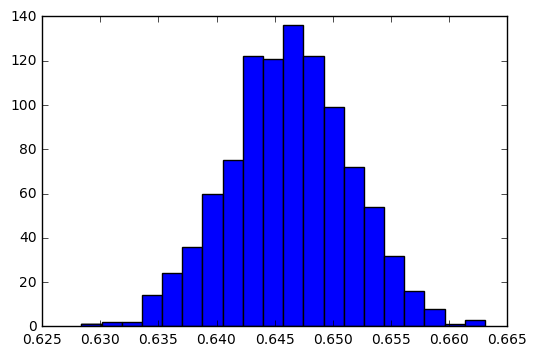

In [22]:
# This is "steeper" than the graph from before, because it has 500 items in each sample.
random.seed(1)
mean_ratios = []
for i in range(1000):
    sample = select_random_sample(500)
    ratios = sample["median_income_hs"] / sample["median_income_college"]
    mean_ratios.append(ratios.mean())
    
plt.hist(mean_ratios, 20)
plt.show()